# Dataset telco.csv

**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Profiling

**Load Dataset**

In [2]:
data_telco = pd.read_csv("data_telco.csv")

**Preview Dataset**

In [3]:
data_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Info Dataset**

In [4]:
data_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Check Missing Value**

In [5]:
data_telco.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

# Data Cleansing

In [6]:
data_telco = pd.read_csv("data_telco.csv")
data_telco.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,NaN,NaN,NaN,NaN,8,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,NaN,NaN,NaN,NaN,22,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,NaN,NaN,NaN,NaN,10,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,NaN,NaN,NaN,NaN,28,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,NaN,NaN,NaN,NaN,62,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
data_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data_telco.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [9]:
data_telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6034.000000,7043.000000,7043.000000
mean,0.161916,32.371149,64.761692
std,0.368404,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
data_telco['StreamingTV'].value_counts()

No                     2403
Yes                    2310
No internet service    1321
Name: StreamingTV, dtype: int64

In [11]:
data_telco['StreamingTV'] = data_telco.StreamingTV.fillna("Unknown")

data_telco['StreamingTV'].value_counts()

No                     2403
Yes                    2310
No internet service    1321
Unknown                1009
Name: StreamingTV, dtype: int64

# Exploratory Data Analysis

In [12]:
data_telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6034.000000,7043.000000,7043.000000
mean,0.161916,32.371149,64.761692
std,0.368404,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
data_telco['StreamingMovies'].value_counts()

No                     2394
Yes                    2319
No internet service    1321
Name: StreamingMovies, dtype: int64

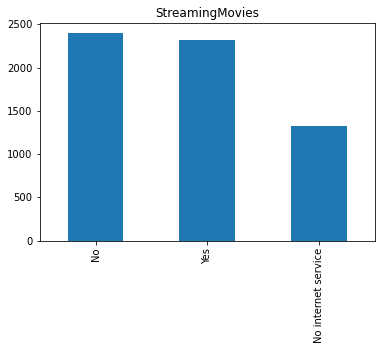

In [14]:
# Visualization
data_telco['StreamingMovies'].value_counts().plot(kind='bar')
plt.title('StreamingMovies');

<AxesSubplot:>

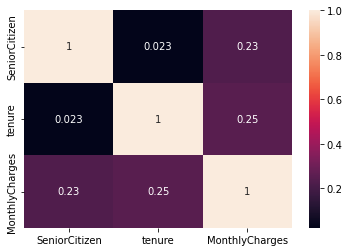

In [15]:
# correlation
plt.figure(figsize = (6,4))
sns.heatmap(data_telco.corr(), annot=True)

# Feature Engineering

In [16]:
# Coloumn Sex data_telco

data_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
sex_enc_telco = pd.get_dummies(data_telco['gender'],prefix="sex",drop_first = False)
sex_enc_telco

,sex_Female,sex_Male
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7038,0,1
7039,1,0
7040,1,0
7041,0,1


In [18]:
data_telco = data_telco.drop(['gender'],axis=1)

In [19]:
data_telco = pd.concat([data_telco,sex_enc_telco],axis=1)
data_telco

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,sex_Female,sex_Male
0,7590-VHVEG,NaN,NaN,NaN,1,No,NaN,NaN,NaN,NaN,...,Unknown,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0
1,5575-GNVDE,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,NaN,...,Unknown,NaN,One year,No,Mailed check,56.95,1889.5,No,0,0
2,3668-QPYBK,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,NaN,...,Unknown,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0
3,7795-CFOCW,NaN,NaN,NaN,45,No,NaN,NaN,NaN,NaN,...,Unknown,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0
4,9237-HQITU,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,NaN,...,Unknown,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,1
7039,2234-XADUH,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1,0
7040,4801-JZAZL,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1,0
7041,8361-LTMKD,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0,1


In [20]:
# Coloumn Contract

In [21]:
data_telco['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
data_telco['Contract'] = data_telco['Contract'].map({"Month-to-month":0,"One year":1,"Two year":2})

In [23]:
data_telco['Contract'] = data_telco['Contract'].map({"Month-to-month":0,"One year":1,"Two year":2})
data_telco

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,sex_Female,sex_Male
0,7590-VHVEG,NaN,NaN,NaN,1,No,NaN,NaN,NaN,NaN,...,Unknown,NaN,NaN,Yes,Electronic check,29.85,29.85,No,0,0
1,5575-GNVDE,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,NaN,...,Unknown,NaN,NaN,No,Mailed check,56.95,1889.5,No,0,0
2,3668-QPYBK,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,NaN,...,Unknown,NaN,NaN,Yes,Mailed check,53.85,108.15,Yes,0,0
3,7795-CFOCW,NaN,NaN,NaN,45,No,NaN,NaN,NaN,NaN,...,Unknown,NaN,NaN,No,Bank transfer (automatic),42.30,1840.75,No,0,0
4,9237-HQITU,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,NaN,...,Unknown,NaN,NaN,Yes,Electronic check,70.70,151.65,Yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,NaN,Yes,Mailed check,84.80,1990.5,No,0,1
7039,2234-XADUH,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,NaN,Yes,Credit card (automatic),103.20,7362.9,No,1,0
7040,4801-JZAZL,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,NaN,Yes,Electronic check,29.60,346.45,No,1,0
7041,8361-LTMKD,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,NaN,Yes,Mailed check,74.40,306.6,Yes,0,1


In [24]:
# Column Churn

In [25]:
data_telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [26]:
data_telco['Churn'] = data_telco['Churn'].map({'Yes':1,'No':0})
data_telco['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [27]:
data_telco['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [63]:
data_telco.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,1,No,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,NaN,NaN,NaN,45,No,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Yes,Electronic check,70.70,151.65,1
